# 서포트 벡터 머신_분류

In [106]:
execfile('setting.py')

In [107]:
%matplotlib inline 

In [108]:
def fun_data_layout(v_data):
    print("Data 구조:", v_data.shape)
    print()
    print("변수 : ", v_data.columns)
    print()
    #print(v_data.head()) <- Text format... 식별 불편
    # v_data.head()  <- 직접 적용 안됨

## 데이터 구성하기

In [109]:
df_raw = pd.read_csv(path2 + '유방암.csv',encoding="euc-kr")
df_raw.head()

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0        음성        15.12         16.68           98.78      716.6   
1        양성        10.80          9.71           68.77      357.6   
2        음성        18.31         18.58          118.60     1041.0   
3        양성        14.92         14.93           96.45      686.9   
4        양성        12.89         13.12           81.89      515.9   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   
3          0.08098           0.08549         0.05539              0.03221   
4          0.06955           0.03729         0.02260              0.01171   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   
3         0.1687  ...         17.18          18.22           112.00   
4         0.1337  ...         13.62          15.54            87.40   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910             0.3331           0.3327   
1       414.0           0.14360             0.1257           0.1047   
2      1410.0           0.12340             0.2445           0.3538   
3       906.6           0.10650             0.2791           0.3151   
4       577.0           0.09616             0.1147           0.1186   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  

[5 rows x 31 columns]

## 음성을 0 양성을 1로 대체

In [110]:
df_raw.diagnosis.replace({'음성':0, '양성':1}, inplace=True)

In [111]:
df_raw

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0            0        15.12         16.68           98.78      716.6   
1            1        10.80          9.71           68.77      357.6   
2            0        18.31         18.58          118.60     1041.0   
3            1        14.92         14.93           96.45      686.9   
4            1        12.89         13.12           81.89      515.9   
..         ...          ...           ...             ...        ...   
315          0        19.55         23.21          128.90     1174.0   
316          0        19.10         26.29          129.10     1132.0   
317          0        24.25         20.20          166.20     1761.0   
318          0        19.17         24.80          132.40     1123.0   
319          1        11.76         21.60           74.72      427.9   

     mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0            0.08876           0.09588         0.07550              0.04079   
1            0.09594           0.05736         0.02531              0.01698   
2            0.08588           0.08468         0.08169              0.05814   
3            0.08098           0.08549         0.05539              0.03221   
4            0.06955           0.03729         0.02260              0.01171   
..               ...               ...             ...                  ...   
315          0.10100           0.13180         0.18560              0.10210   
316          0.12150           0.17910         0.19370              0.14690   
317          0.14470           0.28670         0.42680              0.20120   
318          0.09740           0.24580         0.20650              0.11180   
319          0.08637           0.04966         0.01657              0.01115   

     mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0           0.1594  ...         17.77          20.24           117.70   
1           0.1381  ...         11.60          12.02            73.66   
2           0.1621  ...         21.31          26.36           139.20   
3           0.1687  ...         17.18          18.22           112.00   
4           0.1337  ...         13.62          15.54            87.40   
..             ...  ...           ...            ...              ...   
315         0.1989  ...         20.82          30.44           142.00   
316         0.1634  ...         20.33          32.72           141.30   
317         0.2655  ...         26.02          23.99           180.90   
318         0.2397  ...         20.96          29.94           151.70   
319         0.1495  ...         12.98          25.72            82.98   

     worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0         989.5           0.14910            0.33310          0.33270   
1         414.0           0.14360            0.12570          0.10470   
2        1410.0           0.12340            0.24450          0.35380   
3         906.6           0.10650            0.27910          0.31510   
4         577.0           0.09616            0.11470          0.11860   
..          ...               ...                ...              ...   
315      1313.0           0.12510            0.24140          0.38290   
316      1298.0           0.13920            0.28170          0.24320   
317      2073.0           0.16960            0.42440          0.58030   
318      1332.0           0.10370            0.39030          0.36390   
319       516.5           0.10850            0.08615          0.05523   

     worst_concave_points  worst_symmetry  worst_fractal_dimension  
0                 0.12520          0.3415                  0.09740  
1                 0.04603          0.2090                  0.07699  
2                 0.15710          0.3206                  0.06938  
3                 0.11470          0.2688                  0.08273  
4                 0.05366          0.2309                  0.06915  
..                    .

## 데이터 전처리

In [112]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (320, 30)
분할 후 설명변수 데이터 :Train (192, 30)   Test (128, 30)


In [113]:
df_raw.head(10)

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0          0       15.120         16.68           98.78      716.6   
1          1       10.800          9.71           68.77      357.6   
2          0       18.310         18.58          118.60     1041.0   
3          1       14.920         14.93           96.45      686.9   
4          1       12.890         13.12           81.89      515.9   
5          1       13.680         16.33           87.76      575.5   
6          1       16.170         16.07          106.30      788.5   
7          0       15.280         22.41           98.92      710.6   
8          1        9.738         11.97           61.24      288.5   
9          1       15.000         15.51           97.45      684.5   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   
3          0.08098           0.08549         0.05539              0.03221   
4          0.06955           0.03729         0.02260              0.01171   
5          0.09277           0.07255         0.01752              0.01880   
6          0.09880           0.14380         0.06651              0.05397   
7          0.09057           0.10520         0.05375              0.03263   
8          0.09250           0.04102         0.00000              0.00000   
9          0.08371           0.10960         0.06505              0.03780   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   
3         0.1687  ...         17.18          18.22           112.00   
4         0.1337  ...         13.62          15.54            87.40   
5         0.1631  ...         15.85          20.20           101.60   
6         0.1990  ...         16.97          19.14           113.10   
7         0.1727  ...         17.80          28.03           113.80   
8         0.1903  ...         10.62          14.10            66.53   
9         0.1881  ...         16.41          19.31           114.20   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910            0.33310           0.3327   
1       414.0           0.14360            0.12570           0.1047   
2      1410.0           0.12340            0.24450           0.3538   
3       906.6           0.10650            0.27910           0.3151   
4       577.0           0.09616            0.11470           0.1186   
5       773.4           0.12640            0.15640           0.1206   
6       861.5           0.12350            0.25500           0.2114   
7       973.1           0.13010            0.32990           0.3630   
8       342.9           0.12340            0.07204           0.0000   
9       808.2           0.11360            0.36270           0.3402   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  
5               0.08704          0.2806                  0.07782  
6               0.12510          0.3153                  0.08960  
7               0.12260          0.3175                  0.09772  
8               0.00000          0.3105                  0.08151  
9               0.13790          0.2954                  0.08362  

[10 rows x 31 columns]

In [114]:
df_raw_x.head(10)

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0       15.120         16.68           98.78      716.6          0.08876   
1       10.800          9.71           68.77      357.6          0.09594   
2       18.310         18.58          118.60     1041.0          0.08588   
3       14.920         14.93           96.45      686.9          0.08098   
4       12.890         13.12           81.89      515.9          0.06955   
5       13.680         16.33           87.76      575.5          0.09277   
6       16.170         16.07          106.30      788.5          0.09880   
7       15.280         22.41           98.92      710.6          0.09057   
8        9.738         11.97           61.24      288.5          0.09250   
9       15.000         15.51           97.45      684.5          0.08371   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.09588         0.07550              0.04079         0.1594   
1           0.05736         0.02531              0.01698         0.1381   
2           0.08468         0.08169              0.05814         0.1621   
3           0.08549         0.05539              0.03221         0.1687   
4           0.03729         0.02260              0.01171         0.1337   
5           0.07255         0.01752              0.01880         0.1631   
6           0.14380         0.06651              0.05397         0.1990   
7           0.10520         0.05375              0.03263         0.1727   
8           0.04102         0.00000              0.00000         0.1903   
9           0.10960         0.06505              0.03780         0.1881   

   mean_fractal_dimension  ...  worst_radius  worst_texture  worst_perimeter  \
0                 0.05986  ...         17.77          20.24           117.70   
1                 0.06400  ...         11.60          12.02            73.66   
2                 0.05425  ...         21.31          26.36           139.20   
3                 0.05669  ...         17.18          18.22           112.00   
4                 0.05581  ...         13.62          15.54            87.40   
5                 0.06155  ...         15.85          20.20           101.60   
6                 0.06572  ...         16.97          19.14           113.10   
7                 0.06317  ...         17.80          28.03           113.80   
8                 0.06422  ...         10.62          14.10            66.53   
9                 0.05907  ...         16.41          19.31           114.20   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910            0.33310           0.3327   
1       414.0           0.14360            0.12570           0.1047   
2      1410.0           0.12340            0.24450           0.3538   
3       906.6           0.10650            0.27910           0.3151   
4       577.0           0.09616            0.11470           0.1186   
5       773.4           0.12640            0.15640           0.1206   
6       861.5           0.12350            0.25500           0.2114   
7       973.1           0.13010            0.32990           0.3630   
8       342.9           0.12340            0.07204           0.0000   
9       808.2           0.11360            0.36270           0.3402   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  
5               0.08704          0.2806                  0.07782  
6               0.12510          0.3153                  0.08960  
7               0.12260          0.3175                  0.09772  
8               0.00000          0.3105                  0.08151  
9      

## 모델 생성

#### 기본 옵션으로 SVC 모델 생성

In [115]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

SVC(random_state=1234)

Accuracy on training set: 0.885
Accuracy on test set: 0.891


- 모델의 정확도 Training 88.5%, test 89.1% 

In [116]:
# 실행옵션 확인
print(svm_uncustomized.get_params().keys())
print(svm_uncustomized.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 1234, True, 0.001, False])


#### C: 규제에 대한 강도 변경

In [121]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# c: 규제(0.01, 0.1, 1, 10, 100)
para_c = [10 **c for c in range(-4, 1)]
# para_c = [0.1 * c for c in range(1, 11)] )] # C 변화 구간 변경: 0.1~1.0

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

SVC(C=0.0001, random_state=1234)

SVC(C=0.001, random_state=1234)

SVC(C=0.01, random_state=1234)

SVC(C=0.1, random_state=1234)

SVC(C=1, random_state=1234)

In [118]:
para_c

[0.01, 0.1, 1, 10, 100]

In [119]:
# C별 정확도 테이블
df_accuracy_c.round(3)

C  TrainAccuracy  TestAccuracy
0    0.01          0.599         0.758
1    0.10          0.854         0.859
2    1.00          0.885         0.891
3   10.00          0.906         0.922
4  100.00          0.927         0.930

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'C')

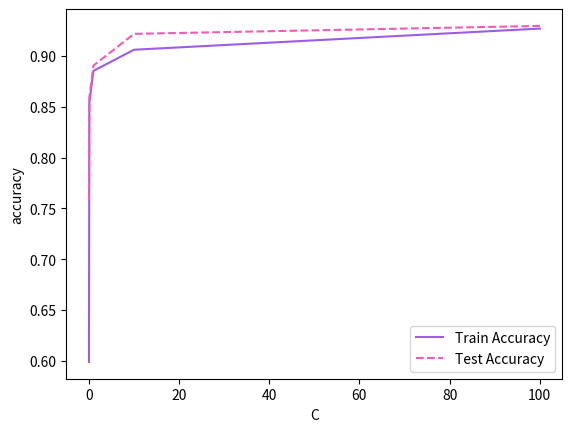

In [120]:
# 정확도를 그래프로 표현
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

- C가 커질정록 모델의 정확도는 증가하지만 증가폭이 미미하고,
   전 구간에서 test모델의 성능이 train보다 오히려 높음
- C의 영향이 크지 않다고 판단하여 미지정

#### Gamma: 훈련 샘플이 미치는 영향의 범위를 변경

In [122]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# gamma: 규제(0.01, 0.1, 1, 10)
para_gamma = [10 **gamma for gamma in range(-2, 2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

SVC(gamma=0.01, random_state=1234)

SVC(gamma=0.1, random_state=1234)

SVC(gamma=1, random_state=1234)

SVC(gamma=10, random_state=1234)

In [123]:
para_gamma

[0.01, 0.1, 1, 10]

In [124]:
# Gamma별 정확도 테이블
df_accuracy_gamma.round(4)

gamma  TrainAccuracy  TestAccuracy
0   0.01            1.0        0.7812
1   0.10            1.0        0.7656
2   1.00            1.0        0.7656
3  10.00            1.0        0.7656

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'log10(gamma)')

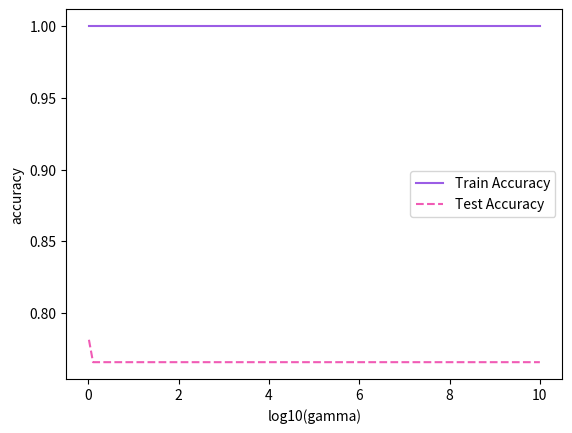

In [126]:
# 정확도를 그래프로 표현
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("log10(gamma)")
plt.legend()

- gamma는 정확도에 별다른 영향을 미치지 않다고 판단하여 미지정

#### scale 변환

In [127]:
# 변수명 저장
v_feature_names = df_train_x.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)
df_scaled.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0    -0.157678     -0.879112       -0.165550  -0.232872        -0.744948   
1    -1.312779     -2.560965       -1.328928  -1.150194        -0.240274   
2     0.695279     -0.420644        0.602798   0.596040        -0.947380   
3    -0.211154     -1.301385       -0.255876  -0.308762        -1.291796   
4    -0.753945     -1.738136       -0.820314  -0.745704        -2.095198   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0         -0.479220       -0.550769            -0.628488      -0.997431   
1         -1.153621       -1.143404            -1.199934      -1.773612   
2         -0.675307       -0.477679            -0.212084      -0.899042   
3         -0.661126       -0.788224            -0.834410      -0.658535   
4         -1.505004       -1.175403            -1.326415      -1.933950   

   mean_fractal_dimension  ...  worst_radius  worst_texture  worst_perimeter  \
0               -0.392627  ...     -0.149283      -1.156442        -0.153789   
1                0.184077  ...     -1.341759      -2.517236        -1.380396   
2               -1.174101  ...      0.534893      -0.143296         0.445031   
3               -0.834209  ...     -0.263312      -1.490846        -0.312546   
4               -0.956793  ...     -0.951354      -1.934512        -0.997708   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0   -0.224951          0.490637           0.139396        -0.094470   
1   -1.124201          0.254373          -1.046076        -1.159323   
2    0.432104         -0.613360          -0.367031         0.004076   
3   -0.354487         -1.339335          -0.169261        -0.176669   
4   -0.869505         -1.783511          -1.108951        -1.094404   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0             -0.301949        0.525611                 0.511081  
1             -1.480312       -1.387506                -0.507149  
2              0.172850        0.223844                -0.886803  
3             -0.458230       -0.524077                -0.220788  
4             -1.366747       -1.071301                -0.898278  

[5 rows x 30 columns]

In [128]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4,random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("train data Y size : {}".format(df_scaled_test_x.shape))

train data X size : (192, 30)
train data Y size : (128, 30)


#### scale 조절 후 SVC 모델 재실행

In [130]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

SVC(random_state=1234)

Accuracy on training set: 0.995
Accuracy on test set: 0.961


- Scale 조절 후 모델의 정확도 Train 99.5%, test 96.1%

#### C: 규제에 대한 강도 변경

In [131]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# c: 규제(0.1 ~2.0)
para_c = [c * 0.1 for c in range(1,21)]
# para_c = [10 **c for c in range(-2, 3)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

SVC(C=0.1, random_state=1234)

SVC(C=0.2, random_state=1234)

SVC(C=0.30000000000000004, random_state=1234)

SVC(C=0.4, random_state=1234)

SVC(C=0.5, random_state=1234)

SVC(C=0.6000000000000001, random_state=1234)

SVC(C=0.7000000000000001, random_state=1234)

SVC(C=0.8, random_state=1234)

SVC(C=0.9, random_state=1234)

SVC(random_state=1234)

SVC(C=1.1, random_state=1234)

SVC(C=1.2000000000000002, random_state=1234)

SVC(C=1.3, random_state=1234)

SVC(C=1.4000000000000001, random_state=1234)

SVC(C=1.5, random_state=1234)

SVC(C=1.6, random_state=1234)

SVC(C=1.7000000000000002, random_state=1234)

SVC(C=1.8, random_state=1234)

SVC(C=1.9000000000000001, random_state=1234)

SVC(C=2.0, random_state=1234)

In [132]:
# C별 정확도 테이블 
df_accuracy_c.round(3)

C  TrainAccuracy  TestAccuracy
0   0.1          0.964         0.906
1   0.2          0.969         0.930
2   0.3          0.974         0.930
3   0.4          0.979         0.938
4   0.5          0.984         0.930
5   0.6          0.995         0.938
6   0.7          0.995         0.945
7   0.8          0.995         0.953
8   0.9          0.995         0.953
9   1.0          0.995         0.961
10  1.1          0.995         0.961
11  1.2          0.995         0.961
12  1.3          0.995         0.961
13  1.4          0.995         0.961
14  1.5          0.995         0.961
15  1.6          0.995         0.961
16  1.7          0.995         0.961
17  1.8          0.995         0.961
18  1.9          0.995         0.961
19  2.0          0.995         0.961

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'C')

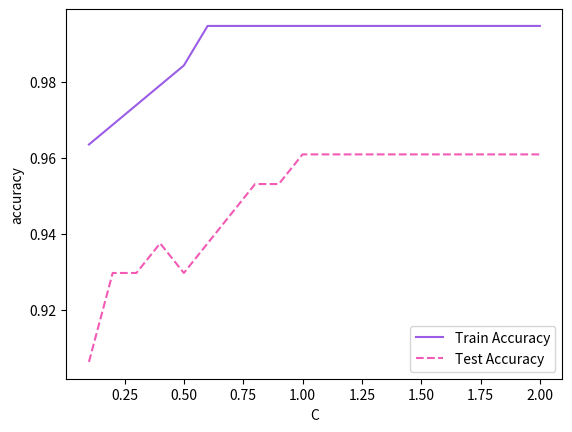

In [133]:
# 정확도를 그래프로 표현
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

- C가 증가할수록 모델의 정확도도 증가함. 
- Train/Test 모델의 성능 변화를 검토하여 0.4 선택.
- Train,Test 모델의 정확도가 많이 증가하고 둘 차이가 적음.

In [134]:
# 임의로 지정
C = 0.4

In [135]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# para_gamma = [10 **gamma for gamma in range(-2, 2)] # 0.01, 0.1, 1, 10)
para_gamma = [0.05 * gamma for gamma in range(1, 15)] # 0.05 ~ 0.70

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C=0.4, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

SVC(C=0.4, gamma=0.05, random_state=1234)

SVC(C=0.4, gamma=0.1, random_state=1234)

SVC(C=0.4, gamma=0.15000000000000002, random_state=1234)

SVC(C=0.4, gamma=0.2, random_state=1234)

SVC(C=0.4, gamma=0.25, random_state=1234)

SVC(C=0.4, gamma=0.30000000000000004, random_state=1234)

SVC(C=0.4, gamma=0.35000000000000003, random_state=1234)

SVC(C=0.4, gamma=0.4, random_state=1234)

SVC(C=0.4, gamma=0.45, random_state=1234)

SVC(C=0.4, gamma=0.5, random_state=1234)

SVC(C=0.4, gamma=0.55, random_state=1234)

SVC(C=0.4, gamma=0.6000000000000001, random_state=1234)

SVC(C=0.4, gamma=0.65, random_state=1234)

SVC(C=0.4, gamma=0.7000000000000001, random_state=1234)

In [136]:
# Gamma별 정확도 테이블 
df_accuracy_gamma.round(3)

gamma  TrainAccuracy  TestAccuracy
0    0.05          0.974         0.930
1    0.10          0.964         0.898
2    0.15          0.964         0.891
3    0.20          0.958         0.867
4    0.25          0.938         0.859
5    0.30          0.901         0.852
6    0.35          0.865         0.852
7    0.40          0.802         0.812
8    0.45          0.766         0.789
9    0.50          0.729         0.773
10   0.55          0.677         0.766
11   0.60          0.661         0.766
12   0.65          0.630         0.758
13   0.70          0.615         0.758

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'gamma')

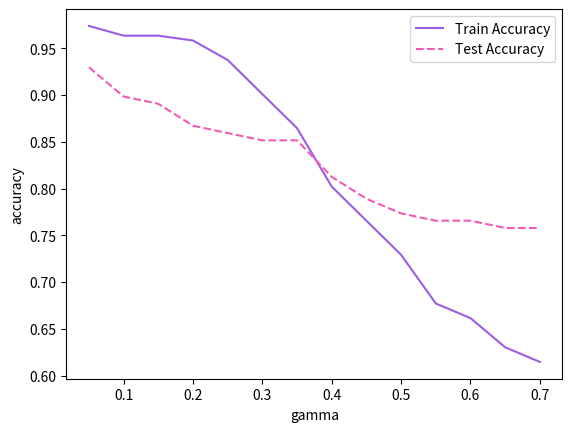

In [138]:
# Gamma별 정확도 그래프로 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

-0.35 이상부터 과적합 발생, gamma가 증가할수록 Train 감소하므로 0.1 선택

In [139]:
# 임의로 지정
gamma = 0.1

## 결론 도출

In [141]:
# 최종 모델
svc_final = SVC(gamma = 0.1, C = 0.4, random_state=1234)
svc_final.fit(df_scaled_train_x, df_train_y)
# 평가
y_pred = svc_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print("Accucary on training set: {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(svc_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

SVC(C=0.4, gamma=0.1, random_state=1234)

Accucary on training set: 0.964
Accuracy on test set: 0.898

Confusion matrix: 
[[92  5]
 [ 8 23]]
              precision    recall  f1-score   support

           0      0.920     0.948     0.934        97
           1      0.821     0.742     0.780        31

    accuracy                          0.898       128
   macro avg      0.871     0.845     0.857       128
weighted avg      0.896     0.898     0.897       128



- 모델의 정확도 Training 88.5%, test 89.1% 에서 Training 96.4%, Test 89.8%로 개선

- "1"을 기준으로 f1_score(78%), 재현율, 정미로 > 0.5 이상인 값 도출

### Grid Search

In [142]:
estimator = SVC(random_state=1234)
# 구하고자 하는 parameter와 범위선
param_grid = {"C": para_c,
              "gamma": para_gamma}
# 정확도가 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_scaled_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

GridSearchCV(estimator=SVC(random_state=1234), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                               0.6000000000000001, 0.7000000000000001, 0.8, 0.9,
                               1.0, 1.1, 1.2000000000000002, 1.3,
                               1.4000000000000001, 1.5, 1.6, 1.7000000000000002,
                               1.8, 1.9000000000000001, 2.0],
                         'gamma': [0.05, 0.1, 0.15000000000000002, 0.2, 0.25,
                                   0.30000000000000004, 0.35000000000000003,
                                   0.4, 0.45, 0.5, 0.55, 0.6000000000000001,
                                   0.65, 0.7000000000000001]},
             scoring='accuracy')

best estimator model: 
SVC(C=0.1, gamma=0.05, random_state=1234)

best parameter: 
{'C': 0.1, 'gamma': 0.05}

best score: 
0.958


- GridSearchCV를 이용한 최적 parameter C=0.1, gamma = 0.05추천. 정확도는 95.8%

- GridSearch가 더 높은 설명력을 가져 C=0.1, gamma = 0.05 의 모델 선택

 - scale변환을 선행하여 올바른 설명변수와 목표변수의 관계를 갖게 할 수 있었다. 
 - C, gamma의 최적 값 탐색이 중요함을 인지!